In [10]:
from cpnLES_MSCARTlib import POLCARTdset
from cpnRetrievalslib import Bispec_LUT
import cpnCommonlib as cpn
import matplotlib.pyplot as plt
import numpy as np
import time, os
cpn.setup_figures(plt)


In [2]:
#Old LUTs
SZA=120
LUT=Bispec_LUT('/umbc/xfs1/zzbatmos/users/charaj1/LES_MSCART_retrievals/LUTs/',\
                   'MODIS_LUT_extended_SZA%03d_RAA000.nc'%(180-int(SZA)))
LUT.readLUT()

### Sanity check with previous LUTs

In [20]:
#testing microphysics computations
testm2=POLCARTdset('cfree',nmldpath='b0p860_fields/')
testm2.readMSCARTplus('testMP20p860_ve0p05re12p50COT5p12SZA120_NPH1e3.nc',fdpath='results/b0p860/',clm=True,step=True)
testm2.remove_redundant_nadir()
testmS=POLCARTdset('cfree',nmldpath='b2p13_fields/')
testmS.readMSCARTplus('testMP22p13_ve0p05re12p50COT5p12SZA120_NPH1e3.nc',fdpath='results/b2p13/',clm=True,step=True)
testmS.remove_redundant_nadir()

testMP20p860_ve0p05re12p50COT5p12SZA120_NPH1e3.nc is a single batch file
testMP22p13_ve0p05re12p50COT5p12SZA120_NPH1e3.nc is a single batch file


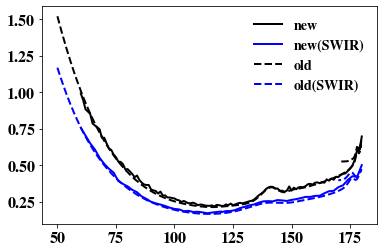

In [21]:
plt.plot(testm2.ScatA,testm2.MeanPRad[:,0],'k',label='new')
plt.plot(testmS.ScatA,testmS.MeanPRad[:,0],'b',label='new(SWIR)')
plt.plot(LUT.scat,LUT.I[0,57,4,21,:],'k--',label='old')#LUT.I(band,COT,ve,re,scatA)
plt.plot(LUT.scat,LUT.I[1,57,4,21,:],'b--',label='old(SWIR)')#LUT.I(band,COT,ve,re,scatA)
plt.legend()

## Setting up field files to MSCART

- Use field_file_MSCART.py

## Writing fieldfile name list

In [41]:
import os

band = 1# 0-0.470, 1-0.86, 2-2.13
bnd = {0:'0p470',1:'0p860',2:'2p13'}
ouP = './b'+bnd[band]+'_fields/'

LUT=Bispec_LUT('/umbc/xfs1/zzbatmos/users/charaj1/LES_MSCART_retrievals/LUTs/',\
               'MODIS_LUT_extended_SZA%03d_RAA000.nc'%(60))
LUT.readLUT()

new_re=np.concatenate([np.array(LUT.re),np.array((LUT.re[1:]+LUT.re[0:-1])/2)])
new_re.sort()
new_re=np.unique(new_re.round(2))
new_tau=np.concatenate([np.array(LUT.tau),np.array((LUT.tau[1:]+LUT.tau[0:-1])/2)])
new_tau.sort()
new_tau=np.unique(new_tau.round(2))

re_list = new_re#np.unique(LUT.re.round(2))
cot_list = new_tau #np.unique(LUT.tau.round(2))
ve = 0.05
fname_list=["" for x in np.arange(re_list.size*cot_list.size)]
i=0
for re in re_list:
    for COT in cot_list:
        jobid='LUT'+bnd[band]+'_ve%0.2fre%0.2fCOT%0.2f'%(ve,re,COT)
        fname_list[i] = jobid.replace('.','p')
        i+=1
fname_list=np.array(fname_list)
fname = 'LUT'+bnd[band]+('_ve%0.2frexCOTx'%(ve)).replace('.','p')+'.dat'
if not os.path.exists(fname):
    np.savetxt('LUT'+bnd[band]+('_ve%0.2frexCOTx'%(ve)).replace('.','p')+'.dat',fname_list,fmt="%s")
else:
    print("File already exists!")

## Collecting and setting up the LUT

LUT0p860_ve0p05re3p50COT50p12SZA120_SAA000_VAA000plus_NPH1e4.nc is a single batch file


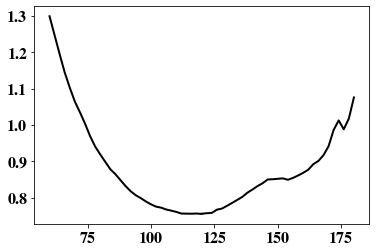

In [43]:
#Checking a single run
test=POLCARTdset('cfree',nmldpath='b0p860_fields/')
test.readMSCARTplus('LUT0p860_ve0p05re3p50COT50p12SZA120_SAA000_VAA000plus_NPH1e4.nc',fdpath='results/b0p860/',clm=True,step=True)
test.remove_redundant_nadir()
plt.plot(test.ScatA,test.MeanPRad[:,0],'k',label='new')

In [123]:
LUT=Bispec_LUT('/umbc/xfs1/zzbatmos/users/charaj1/LES_MSCART_retrievals/LUTs/',\
               'MODIS_LUT_extended_SZA%03d_RAA000.nc'%(60))
LUT.readLUT()

new_re=np.concatenate([np.array(LUT.re),np.array((LUT.re[1:]+LUT.re[0:-1])/2)])
new_re.sort()
new_re=np.unique(new_re.round(2))
new_tau=np.concatenate([np.array(LUT.tau),np.array((LUT.tau[1:]+LUT.tau[0:-1])/2)])
new_tau.sort()
new_tau=np.unique(new_tau.round(2))

ve = 0.05
COT = 73.33
re = 2.00

VNIR=POLCARTdset('radx',nmldpath='b0p860_fields/')
VNIR.readMSCARTplus(('LUT0p860_ve%0.2fre%0.2fCOT%0.2f'%(ve,re,COT)).replace('.','p')+'SZA120_SAA000_VAA000plus_NPH1e4.nc',fdpath='results/b0p860/',clm=True,step=True)
VNIR.remove_redundant_nadir()
SWIR=POLCARTdset('radx',nmldpath='b2p13_fields/')
SWIR.readMSCARTplus(('LUT2p13_ve%0.2fre%0.2fCOT%0.2f'%(ve,re,COT)).replace('.','p')+'SZA120_SAA000_VAA000plus_NPH1e4.nc',fdpath='results/b2p13/',clm=True,step=True)
SWIR.remove_redundant_nadir()
#plt.plot(test.ScatA,test.MeanPRad[:,0],'k',label='new')

FileNotFoundError: [Errno 2] No such file or directory: b'results/b0p860/LUT0p860_ve0p05re2p00COT73p33SZA120_SAA000_VAA000plus_NPH1e4.nc'

In [186]:
cpn.idx_closest(LUT.tau,4.03),cpn.idx_closest(LUT.re,16)

(54, 28)

In [191]:
LUT.I[2,54,4,28,149],SWIR.MeanPRad[31,0]

(0.05708442, 0.13022271)

In [72]:
vars(LUT).keys()

dict_keys(['fdpath', 'fname', 'band', 're', 've', 'tau', 'mu0', 'phi', 'mu', 'scat', 'I', 'Q', 'U'])

In [126]:
LUTnew=Bispec_LUT('/umbc/xfs1/zzbatmos/users/charaj1/taki/ACRS/LUTs/using_MSCART','LESLUT_highres_SZA120_nadir.nc')
LUTnew.band=np.array([0.860,2.13])
LUTnew.re = new_re
LUTnew.ve = np.array([ve])
LUTnew.tau = new_tau
LUTnew.mu0 = np.cos(np.deg2rad(60))
LUTnew.phi = 0.0
LUTnew.mu = np.array([1.0])
LUTnew.scat = np.array([119.99])
RI = np.zeros((2,new_tau.size,new_re.size),dtype=float)
nVNIR,nSWIR=0,0
largeVN,largeSW=0,0
ni = LUTnew.re.size
nj = LUTnew.tau.size
i = 0
f0p86 = open('b0p860_missing.dat','w')
f0p86.close()
f2p13 = open('b2p13_missing.dat','w')
f2p13.close()

start = time.time()
for re in LUTnew.re:
    j=0
    for COT in LUTnew.tau:
        file0p86 = ('LUT0p860_ve%0.2fre%0.2fCOT%0.2f'%(ve,re,COT)).replace('.','p')+'SZA120_SAA000_VAA000plus_NPH1e5.nc'
        file2p13 = ('LUT2p13_ve%0.2fre%0.2fCOT%0.2f'%(ve,re,COT)).replace('.','p')+'SZA120_SAA000_VAA000plus_NPH1e5.nc'
        if os.path.exists('results/b0p860/'+file0p86) and os.path.exists('results/b2p13/'+file2p13):
            VNIR=POLCARTdset('radx',nmldpath='b0p860_fields/')
            VNIR.readMSCARTplus(file0p86,fdpath='results/b0p860/',clm=True,step=True,prnt=False)
            VNIR.remove_redundant_nadir()
            RI[0,j,i] = VNIR.MeanPRad[31,0]
            SWIR=POLCARTdset('radx',nmldpath='b2p13_fields/')
            SWIR.readMSCARTplus(file2p13,fdpath='results/b2p13/',clm=True,step=True,prnt=False)
            SWIR.remove_redundant_nadir()
            RI[1,j,i] = SWIR.MeanPRad[31,0]
            if RI[0,j,i]>10:
                largeVN+=1
                print(file0p86)
            if RI[1,j,i]>10:
                largeSW+=1
        elif os.path.exists('results/b0p860/'+file0p86):
            f2p13 = open('b2p13_missing.dat','a')
            f2p13.write(file2p13.split('SZA',1)[0]+'\n')
            f2p13.close()
            nSWIR+=1
        else:
            f0p86 = open('b0p860_missing.dat','a')
            f0p86.write(file0p86.split('SZA',1)[0]+'\n')
            f0p86.close()            
            nVNIR+=1
        cpn.progress_bar(i,j,ni,nj,start)
        j+=1
    i+=1
print(nVNIR,nSWIR)
print(largeVN,largeSW)
LUTnew.I=np.zeros((2,new_tau.size,1,new_re.size,1))
LUTnew.I[:,:,0,:,0]=RI
#LUTnew.I[LUTnew.I>10] = np.nan

100.00% 0 minutes remaining ... 0 0
0 0


In [70]:
file2p13

'LUT2p13_ve0p05re28p75COT0p94SZA120_SAA000_VAA000plus_NPH1e5.nc'



    - 20 b0p860 missing files (not added the job yet)
    - 1 2p13 missing files (put a job)

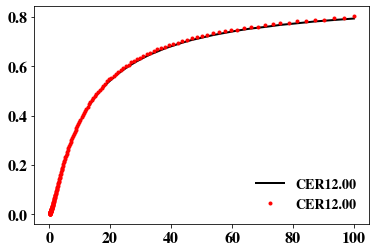

In [127]:
# Comparing with previous LUTs (VNIR band)
# Seems like not enough photons
plt.plot(LUT.tau,LUT.I[0,:,4,20,149],'k',label='CER%0.2f'%(LUT.re[20]))
plt.plot(new_tau,RI[0,:,40],'r.',label="CER%0.2f"%(LUTnew.re[40]))
plt.legend()

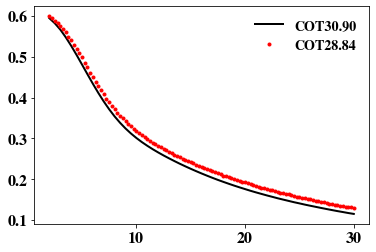

In [128]:
# Comparing with previous LUTs (SWIR band)
# Seems like not enough photons had been used
plt.plot(LUT.re,LUT.I[1,83,4,:,149],'k',label='COT%0.2f'%(LUT.tau[83]))
plt.plot(new_re,RI[1,152,:],'r.',label="COT%0.2f"%(LUTnew.tau[152]))
plt.legend()

In [254]:
LUTnew.I=np.zeros((2,new_tau.size,1,new_re.size,1))
LUTnew.I[:,:,0,:,0]=RI
#LUTnew.I[LUTnew.I>10] = np.nan

In [77]:
np.sum(LUTnew.I>10)

3

In [21]:
LUTnew.I[LUTnew.I>10] = np.nan

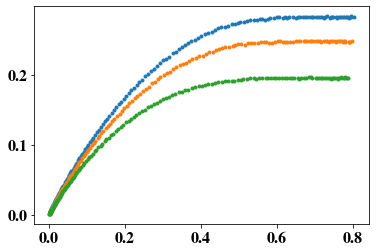

In [97]:
plt.plot(LUTnew.I[0,:,0,40,0],LUTnew.I[1,:,0,40,0],'.')
plt.plot(LUTnew.I[0,:,0,50,0],LUTnew.I[1,:,0,50,0],'.')
plt.plot(LUTnew.I[0,:,0,70,0],LUTnew.I[1,:,0,70,0],'.')

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2aaae217fcc0>)

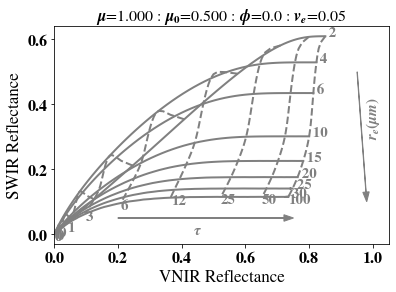

In [153]:
LUT.plotLUT(0,ve=0.05,re_lines=np.array([2,4,6,10,15,20,25,30]))

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2aaae260ba20>)

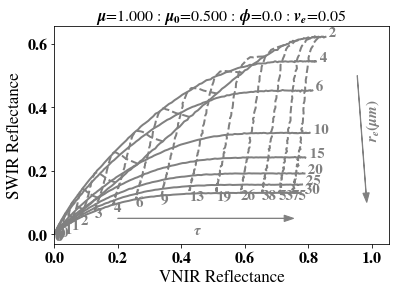

In [152]:
LUTnew.plotLUT(0.0,ve=0.05,pro_type='DISORT',re_lines=np.array([2,4,6,10,15,20,25,30]))

Text(0.5, 1.0, '$\\mu$=1.000 : $\\mu_0$=0.500 : $\\phi$=0.0 : $v_e$=0.05')

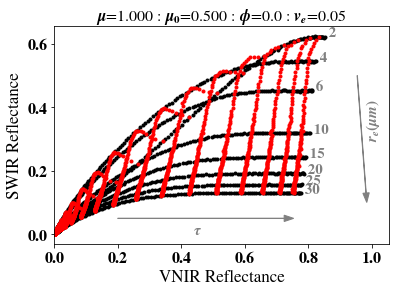

In [146]:
def plotLUT(VNIR_lut,SWIR_lut,reff_lut,tau_lut,re_lines=None,figAx=None,gcolor='grey'):
    '''
    To plot LUT. fig and ax instances will be returned to over plot data.
    re_lines:  Array of re values that are needed to be shown on the LUT plot.
                Make sure all the values are available in self.re
    '''
    if figAx is None:
        fig_LUT,axLUT=plt.subplots()
    else:
        fig_LUT,axLUT=figAx[0],figAx[1]
    if re_lines is None:
        for i in np.arange(0,reff_lut.size,10):
            x=np.squeeze(VNIR_lut[i,:]);y=np.squeeze(SWIR_lut[i,:])
            axLUT.plot(x,y,'k.')
            axLUT.text(x.max(),y.max(),' %d'%reff_lut[i],color=gcolor)
        re_min_ix=np.argmin(reff_lut)
    else:
        p=np.repeat(re_lines,reff_lut.size).reshape(re_lines.size,reff_lut.size)
        q=np.repeat(reff_lut,re_lines.size).reshape(reff_lut.size,re_lines.size)
        re_ln_ix=np.where((p-q.T)==0)[1]
        for i in re_ln_ix:
            x=np.squeeze(VNIR_lut[i,:]);y=np.squeeze(SWIR_lut[i,:])
            axLUT.plot(x,y,'k.')
            axLUT.text(x.max(),y.max(),' %d'%reff_lut[i],color=gcolor)
        re_min_ix=np.squeeze(np.argwhere(reff_lut==re_lines.min()))
    for j in np.arange(0,tau_lut.size,10):
        x=np.squeeze(VNIR_lut[re_min_ix:,j]);y=np.squeeze(SWIR_lut[re_min_ix:,j])
        axLUT.plot(x,y,'r.')
        #axLUT.text(x.min,y.min()-0.02,r'%d'%tau_lut[j],color=gcolor)
        axLUT.set_xlabel('VNIR Reflectance')
        axLUT.set_ylabel('SWIR Reflectance')
    axLUT.set_xlim(0,VNIR_lut.max()+0.2)
    axLUT.arrow(VNIR_lut.max()+.1,0.5,0.03,-0.4,linestyle='-',head_width=0.02,\
              length_includes_head=True,color=gcolor)
    axLUT.annotate(r' $r_e$($\mu m$)',xy=(VNIR_lut.max()+0.12,0.3),color=gcolor,rotation=90)
    axLUT.arrow(0.2,0.05,VNIR_lut.max()-0.3,0,linestyle='-',head_width=0.02,\
              length_includes_head=True,color=gcolor)
    axLUT.annotate(r' $\tau$',xy=(VNIR_lut.max()/2,0),color=gcolor)
    fig_LUT.show()
    return fig_LUT,axLUT
mu_ix=0;re_lines=re_lines=np.array([2,4,6,10,15,20,25,30]); figAx=None;gcolor='grey'
LUT_VNIR=LUTnew.I[0,:,np.where(LUTnew.ve==ve),:,mu_ix].T
LUT_SWIR=LUTnew.I[1,:,np.where(LUTnew.ve==ve),:,mu_ix].T
#LUT_VNIR[LUT_VNIR>10]=np.nan
#LUT_SWIR[LUT_SWIR>10]=np.nan
if re_lines is None:
    fig_LUT,axLUT=plotLUT(LUT_VNIR,LUT_SWIR,LUTnew.re[:],LUTnew.tau,figAx=figAx,gcolor=gcolor)
else:        
    fig_LUT,axLUT=plotLUT(LUT_VNIR,LUT_SWIR,LUTnew.re,LUTnew.tau,re_lines=re_lines,figAx=figAx,gcolor=gcolor)
axLUT.set_title(r'$\mu$=%0.3f : $\mu_0$=%0.3f : $\phi$=%0.1f : $v_e$=%0.2f'%(LUTnew.mu[mu_ix],LUTnew.mu0,LUTnew.phi,ve))

In [103]:
np.where(LUT_VNIR>10)

(array([0, 0, 7]), array([179, 180, 188]), array([0, 0, 0]), array([0, 0, 0]))

In [104]:
LUT_VNIR.shape

(113, 189, 1, 1)

In [111]:
np.where(LUT_VNIR>10)

(array([0, 0, 7]), array([179, 180, 188]), array([0, 0, 0]), array([0, 0, 0]))

In [108]:
LUT_VNIR[np.where(LUT_VNIR>10)]

array([9.96920997e+36, 9.96920997e+36, 9.96920997e+36])

In [122]:
LUTnew.re[0],LUTnew.tau[179]

(2.0, 73.33)

In [119]:
LUTnew.re.shape

(113,)